In [3]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['mathtext.it'] = 'sans serif'
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"

In [10]:
def S(z):
    return Per(z)*l_gr

def Per(z):
    if z >= 0 and z <= z_1:
        return 2*n*(alfa_1(z)*(r + z) + b(z))
    elif z > z_1 and z <= z_2:
        
        return 2*n*alfa_2(z)*(r + z)
    elif z > z_2 and z <= z_3:
        print(alfa_3(z))
        return 2*n*alfa_3(z)*(r + z)

def alfa_1(z):
    return np.pi/2 + beta - teta
def b(z):
    return R*np.sin(beta)/np.sin(teta) - (r + z)*np.tan(teta)**(-1)
def alfa_2(z):
    return beta + np.arcsin(R/(r + z)*np.sin(beta))
def alfa_3(z):
    return alfa_2(z) - dt_alfa_3(z)
def dt_alfa_3(z):
    return np.pi - np.arccos((R**2 + (r + z)**2 - (D/2)**2)/(2*R*(r + z)))

def kappa(e):
    return S(e)/F_sv

def F_sv(z):
    if z >= 0 and z <= z_1:
        return F_sv_1(z)
    elif z > z_1 and z <= z_2:
        return  F_sv_2(z)
    elif z > z_2 and z <= z_3:
        return  F_sv_3(z)

def F_sv_1(z):
    return n*(alfa_1(z)*(r + z)**2 + (R*np.sin(beta)/np.sin(teta) - 
           (r + z)*np.tan(teta)**(-1))*((r + z) + R*np.cos(alfa_1(z))) + 
           R*(r + z)*np.sin(alfa_1(z)))
def F_sv_2(z):
    return n*(alfa_2(z)*(r + z)**2 + R*(r + z)*np.sin(alfa_2(z)))
def F_sv_3(z):
    return n*(alfa_3(z)*(r + z)**2 + R*(r + z)*np.sin(alfa_2(z)) + 
            dt_beta_3(z)*D**2/4 - R*D/2*np.sin(dt_beta_3(z)))
def dt_beta_3(z):
    return np.arccos((R**2 + (D/2)**2 - (r + z)**2)/(R*D))

In [13]:
delta = 1770
omega = 50
r = 6*1e-3
D = 0.196
D_n = D / 0.96
F_ks = np.pi * D**2 / 4
d = np.round(D_n / 2, 4)
z_0 = 0.04
n = 7
teta = np.radians(32)
R = np.round(D/2-z_0 - r, 4)
beta = np.pi/n

z_d = 2*z_0/D
r_ = r/R
F = np.pi*(D**2)/4
alpha_1 = np.pi / 2 + beta - teta
eps_omega = 1 - 1 / beta * ((1 - z_d) / (1 + r_))**2 * (alpha_1*r_**2 + (np.sin(beta) / np.sin(
    teta)-r_*np.cos(teta) / np.sin(teta))*(r_+np.cos(alpha_1))+r_*np.sin(alpha_1))

l_gr = np.round(omega / (delta * eps_omega * F), 4)
z_1 = R*np.sin(beta)/np.cos(teta) - r
z_2 = z_0
z_3 = np.sqrt(R**2 + (D/2)**2 - R*D*np.cos(beta)) - r
z_1, z_2, z_3
print(np.degrees(teta))
print(r)
print(D)
print(z_0)
print(l_gr)
print(R)

32.0
0.006
0.196
0.04
1.1329
0.052


In [14]:
z = np.linspace(0, z_3, 100)
s = np.array([Per(zx) for zx in z ])*l_gr
z1 = np.linspace(0, z_2, 100)
s1 = np.array([Per(zx) for zx in z1 ])
Fsv = np.array([F_sv(zx) for zx in z ])
kappa = s/Fsv
Fsv2 = np.array([F_sv(zx) for zx in z1 ])
kappa2 = s1/Fsv2


0.7940505125021861
0.6915722377837725
0.6169860408044472
0.5551025334597459
0.5009896057065978
0.45229170906627103
0.4076624856855926
0.3662449173849126
0.3274524220074988
0.2908618899094202
0.2561557335271165
0.22308799795831868
0.1914633362059519
0.16112333562113157
0.13193727538609212
0.10379567473338347
0.0766056646646448
0.05028758904011077
0.024772457142590354
2.220446049250313e-16


126.38792288114529


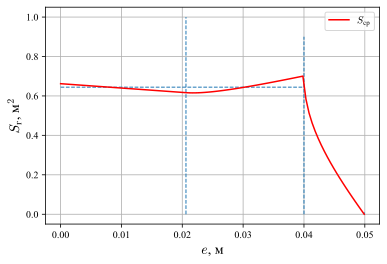

0.6620332344054877


In [15]:
print(kappa[0])
fig = plt.figure()
#plt.ylim([0, 0.7])
plt.plot(z, s, color = 'red', label=r'$S_{\mathrm{ср}}$')
plt.hlines((s1*l_gr).mean(), xmin=0, xmax=z_2, linestyle='--', linewidth=1)
plt.vlines(z_1, ymin=0, ymax=1, linestyle='--', linewidth=1)
plt.vlines(z_2, ymin=0, ymax=0.9, linestyle='--', linewidth=1)
plt.vlines(z_3, ymin=0, ymax=0.01, linestyle='--', linewidth=1)

plt.xlabel(r'$e$, м', fontsize =14)
plt.ylabel(r'$S_{\mathrm{г}}$, м$^2$', fontsize =14)
plt.legend(loc='best')
plt.grid()
plt.savefig(f'S_g(e).png', dpi =300, bbox_inches='tight')
plt.show()
print(s[0])

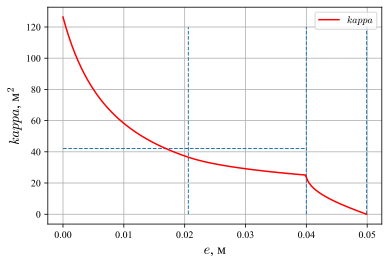

In [16]:
fig = plt.figure()
plt.plot(z, kappa, color = 'red', label=r'$kappa$')
plt.hlines(kappa2.mean(), xmin=0, xmax=z_2, linestyle='--', linewidth=1)
plt.vlines(z_1, ymin=0, ymax=120, linestyle='--', linewidth=1)
plt.vlines(z_2, ymin=0, ymax=120, linestyle='--', linewidth=1)
plt.vlines(z_3, ymin=0, ymax=120, linestyle='--', linewidth=1)

plt.xlabel(r'$e$, м', fontsize =14)
plt.ylabel(r'$kappa$, м$^2$', fontsize =14)
plt.legend(loc='best')
plt.grid()
plt.savefig(f'κ(e).png', dpi =300, bbox_inches='tight')
plt.show()